In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("heart_attack_prediction_india.csv")
df

,Patient_ID,State_Name,Age,Gender,Diabetes,Hypertension,Obesity,Smoking,Alcohol_Consumption,Physical_Activity,...,Diastolic_BP,Air_Pollution_Exposure,Family_History,Stress_Level,Healthcare_Access,Heart_Attack_History,Emergency_Response_Time,Annual_Income,Health_Insurance,Heart_Attack_Risk
0,1,Rajasthan,42,Female,0,0,1,1,0,0,...,119,1,0,4,0,0,157,611025,0,0
1,2,Himachal Pradesh,26,Male,0,0,0,0,1,1,...,115,0,0,7,0,0,331,174527,0,0
2,3,Assam,78,Male,0,0,1,0,0,1,...,117,0,1,10,1,0,186,1760112,1,0
3,4,Odisha,58,Male,1,0,1,0,0,1,...,65,0,0,1,1,1,324,1398213,0,0
4,5,Karnataka,22,Male,0,0,0,0,0,1,...,109,0,0,9,0,0,209,97987,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,Maharashtra,20,Female,0,0,0,1,0,1,...,74,1,1,10,0,0,167,1175023,1,0
9996,9997,Rajasthan,34,Female,0,0,0,0,0,0,...,78,0,1,1,0,0,123,999441,0,1
9997,9998,Gujarat,76,Male,0,0,0,0,0,0,...,98,1,0,1,0,1,376,159536,0,0
9998,9999,Andhra Pradesh,52,Male,0,0,0,0,0,1,...,60,1,0,7,1,0,313,153207,0,0


In [33]:
df.columns

Index(['Patient_ID', 'State_Name', 'Age', 'Gender', 'Diabetes', 'Hypertension',
       'Obesity', 'Smoking', 'Alcohol_Consumption', 'Physical_Activity',
       'Diet_Score', 'Cholesterol_Level', 'Triglyceride_Level', 'LDL_Level',
       'HDL_Level', 'Systolic_BP', 'Diastolic_BP', 'Air_Pollution_Exposure',
       'Family_History', 'Stress_Level', 'Healthcare_Access',
       'Heart_Attack_History', 'Emergency_Response_Time', 'Annual_Income',
       'Health_Insurance', 'Heart_Attack_Risk'],
      dtype='object')

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings("ignore")  # Ignore unnecessary warnings


In [31]:
print("First 5 rows of the dataset:")
print(df.head())

print("Dataset Summary:")
print(df.info())

print("Checking missing values:")
print(df.isnull().sum())

# Drop missing values if any
df.dropna(inplace=True)

First 5 rows of the dataset:
   Patient_ID        State_Name  Age  Gender  Diabetes  Hypertension  Obesity  \
0           1         Rajasthan   42  Female         0             0        1   
1           2  Himachal Pradesh   26    Male         0             0        0   
2           3             Assam   78    Male         0             0        1   
3           4            Odisha   58    Male         1             0        1   
4           5         Karnataka   22    Male         0             0        0   

   Smoking  Alcohol_Consumption  Physical_Activity  ...  Diastolic_BP  \
0        1                    0                  0  ...           119   
1        0                    1                  1  ...           115   
2        0                    0                  1  ...           117   
3        0                    0                  1  ...            65   
4        0                    0                  1  ...           109   

   Air_Pollution_Exposure  Family_History  St

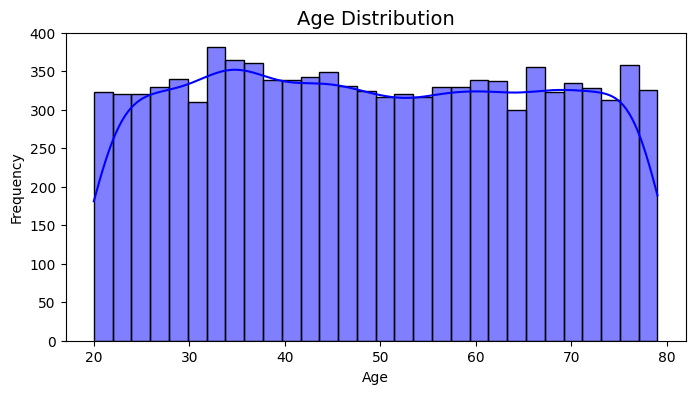

In [7]:
# Histogram to visualize age distribution
plt.figure(figsize=(8, 4))
sns.histplot(df["Age"], bins=30, kde=True, color="blue")
plt.title("Age Distribution", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


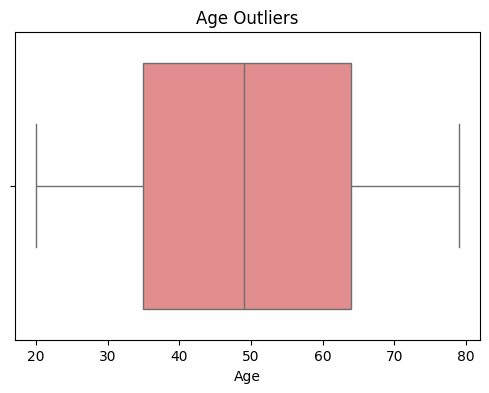

In [8]:
# Boxplot to identify age outliers
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["Age"], color="lightcoral")
plt.title("Age Outliers")
plt.show()

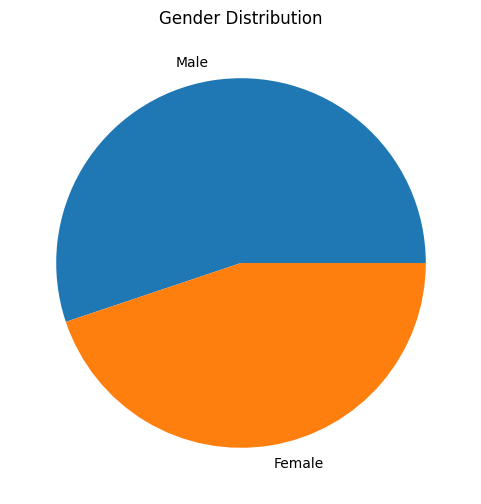

In [32]:
# Pie chart for gender distribution
gender_counts = df["Gender"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index)
plt.title("Gender Distribution")
plt.show()

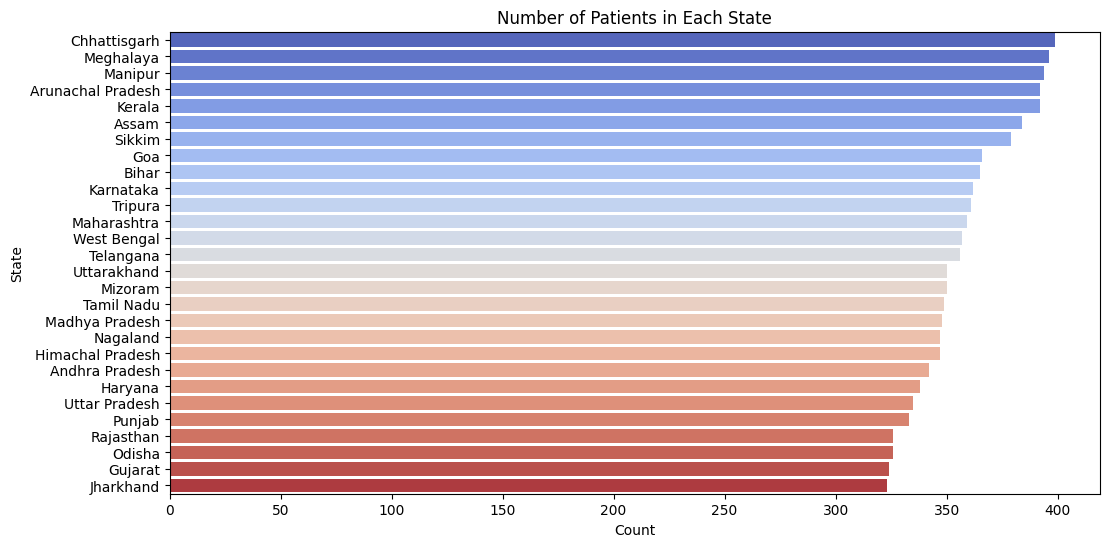

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='State_Name', order=df['State_Name'].value_counts().index, palette="coolwarm")
plt.title('Number of Patients in Each State')
plt.xlabel('Count')
plt.ylabel('State')
plt.show()

<Figure size 800x500 with 0 Axes>

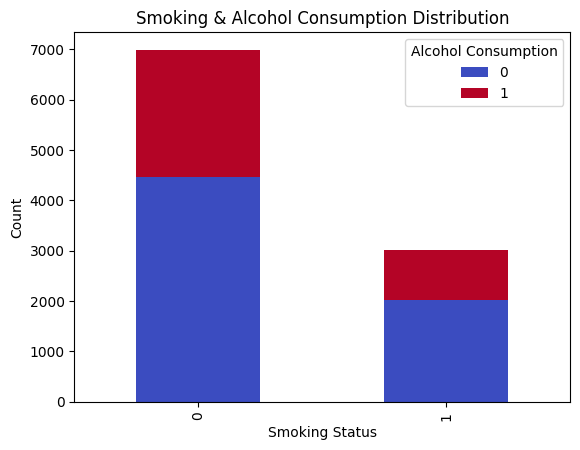

In [12]:
plt.figure(figsize=(8, 5))
smoking_alcohol = df.groupby(['Smoking', 'Alcohol_Consumption'])['Patient_ID'].count().unstack()
smoking_alcohol.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Smoking & Alcohol Consumption Distribution')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.legend(title='Alcohol Consumption')
plt.show()

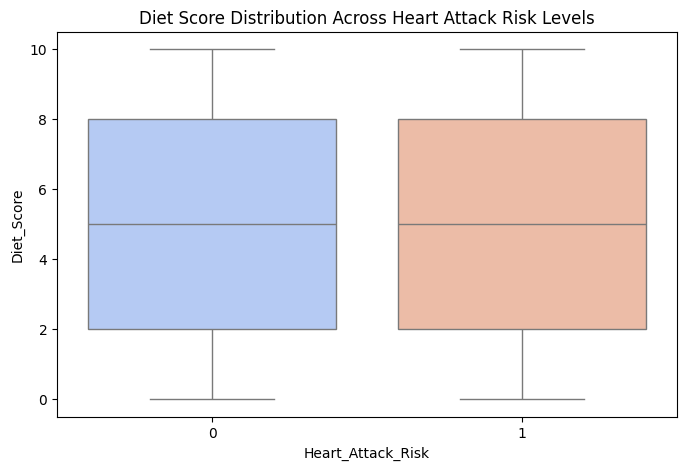

In [13]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Heart_Attack_Risk', y='Diet_Score', data=df, palette="coolwarm")
plt.title('Diet Score Distribution Across Heart Attack Risk Levels')
plt.show()

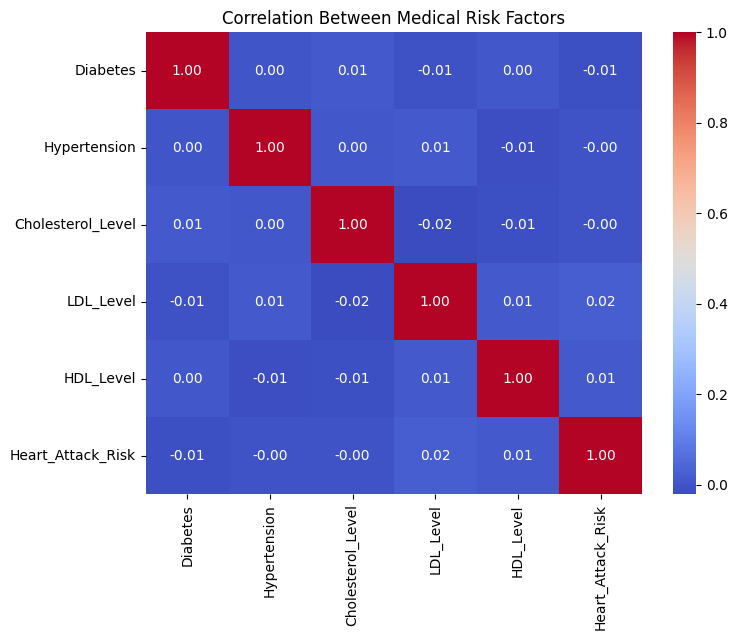

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Diabetes', 'Hypertension', 'Cholesterol_Level', 'LDL_Level', 'HDL_Level', 'Heart_Attack_Risk']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Between Medical Risk Factors')
plt.show()

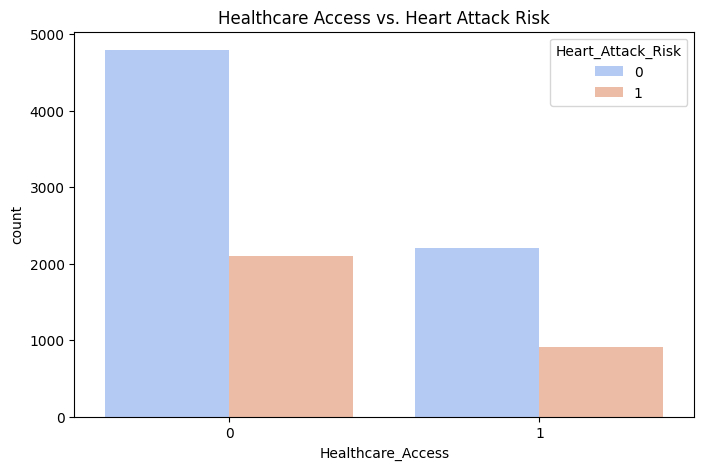

In [15]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Healthcare_Access', hue='Heart_Attack_Risk', palette="coolwarm")
plt.title('Healthcare Access vs. Heart Attack Risk')
plt.show()

In [17]:
X = df.drop('Heart_Attack_Risk', axis=1)
y = df['Heart_Attack_Risk']

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [19]:
categorical_cols = ['State_Name', 'Gender']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # Keep numerical columns unchanged
)

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Import Machine Learning Models
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier

In [34]:
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(),
    #'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    #'AdaBoost': AdaBoostClassifier(),
    #'LDA': LinearDiscriminantAnalysis()
}

In [35]:
accuracy_results = {}

for model_name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipeline.fit(X_train, y_train)
    
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100  # Convert to percentage
    accuracy_results[model_name] = accuracy
    
    print(f"{model_name} Accuracy: {accuracy:.2f}%")

Logistic Regression Accuracy: 70.55%
KNN Accuracy: 63.25%
Naive Bayes Accuracy: 70.55%
Random Forest Accuracy: 70.50%


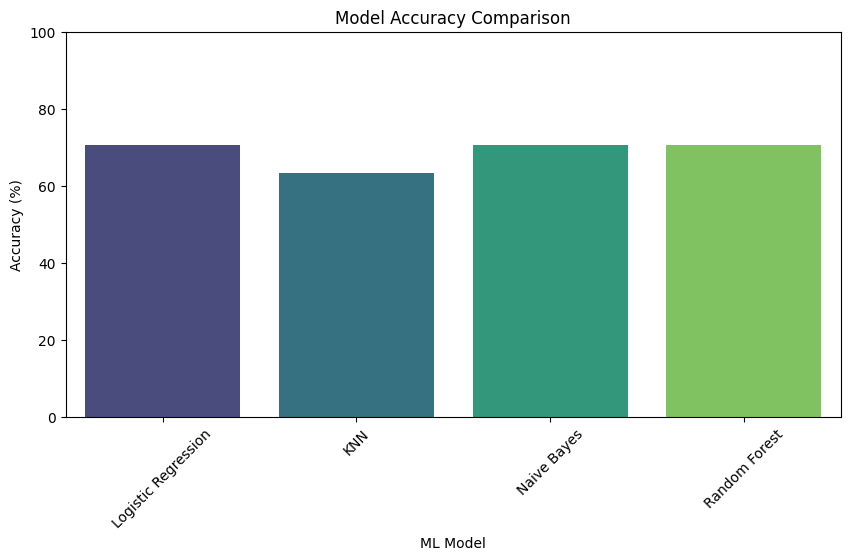

In [36]:
plt.figure(figsize=(10, 5))
sns.barplot(x=list(accuracy_results.keys()), y=list(accuracy_results.values()), palette="viridis")
plt.xticks(rotation=45)
plt.ylabel("Accuracy (%)")
plt.xlabel("ML Model")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 100)  # Set y-axis limit to 100%
plt.show()
